##Učitavanje podataka i potrebnih biblioteka

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dfPortuguese = pd.read_csv("/content/drive/MyDrive/zp-projekt/Portuguese.csv")
dfPortuguese.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
dfPortuguese.shape

(649, 33)

In [ ]:
dfPortuguese.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
dfPortuguese.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Skup podataka (dataset) sastoji se od 640 redaka s po 33 stupca podataka, ni u jednom stupcu nema nedostajućih podataka te sadrži kategoričke i numeričke podatke. Za naš izračun nećemo koristiti sve podatke nego ćemo se ograničiti na neke od njihovih podskupa. Podatci koje ćemo izbaciti iz ciljanog skupa podataka su podatci povezani s izborima roditelja kao što su njihova razina obrazovanja, adrese i razlozi izbora škole jer vjerujemo da nemaju utecaj na spol djeteta.

## Analiza utjecaja spola na navike učenika

Korištenjem dataseta o učenicima želimo provjeriti imaju li učenici različitog spola iste srednje škole navike po kojima bismo mogli pretpostaviti njihov spol. U obzir se uzimaju podatci o tome koliko učenici uče, njihove ocjene, kao i izlasci te količina alkohola koju konzumiraju.


##Izbacivanje nepotrebnih stupaca

In [ ]:
dfPortuguese.drop(['school','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob', 'reason','guardian','traveltime','nursery'], axis=1, inplace=True)

In [ ]:
dfPortuguese

,sex,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,F,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,F,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,F,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,F,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,3,1,no,no,no,yes,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,F,2,0,no,yes,no,no,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,F,2,0,no,no,no,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,M,1,0,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


##Analiza preostalih podataka

In [ ]:
dfPortuguese.describe()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


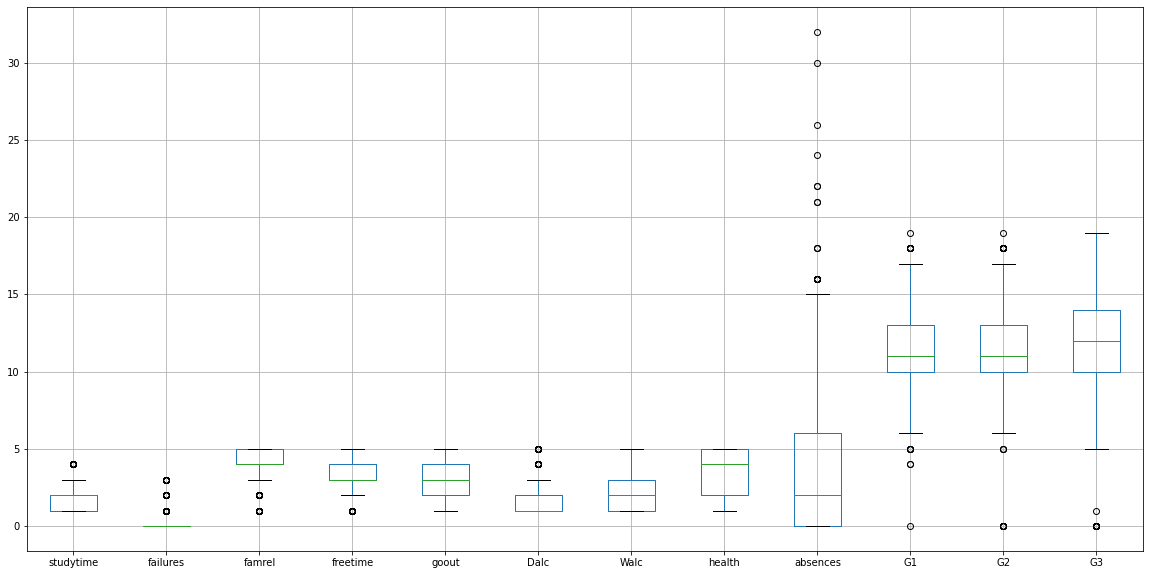

In [ ]:
plt.figure(figsize=(20,10))

dfPortuguese.boxplot()


Kategoričke varijable zatim pretvaramo u numeričke.

In [ ]:
dfPortuguese.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.paid.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.activities.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.higher.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.internet.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.romantic.replace(('yes', 'no'), (1, 0), inplace=True)
dfPortuguese.sex.replace(('M', 'F'), (1, 0), inplace=True)

In [ ]:
dfPortuguese.dtypes

sex           int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

Sada je potrebno preostale podatke detaljnije proučiti.

| stupac |objašnjenje | raspon |
| --- | --- | --- |
|sex       |   spol | 0/1 |
|studytime  |  vrijeme učenja| 1-4|
|failures    | broj palih ispita |0-3|
|schoolsup   | dopunska nastava|0/1|
|famsup      | dodatna pomoč s učenjem od obitelji|0/1|
|paid        | plačene instrukcije|0/1|
|activities   |pohađa izvansatavne aktivnosti|0/1|
|higher       |zanima ih više obrazovanje|0/1|
|internet     |ima pristup interetu|0/1|
|romantic     |u romantičnoj je vezi|0/1|
|famrel      | u dobrim odnosima s obitelji|1-5|
|freetime    | količina slobodnog vremana nakon škole|1-5|
|goout       | izazi s prijateljima|1-5|
|Dalc         |količina pića tjekom radnog dana|1-5|
|Walc         |količina pića vikendom|1-5|
|health       |zdrastveno stanje|1-5|
|absences     |broj izostanka|0-32|
|G1           |ocjena prvo polugodište|0-19|
|G2           |ocjene drugo polugodište|0-19|
|G3           |završna ocjena |0-19|



U ovoj tablici kao i ranijem boxplot grafu primjećujemo da nam podatci nisu izraženi u istim skalama pa će biti potrebno skalirati podatke.

Text(0.5, 1.0, 'Matrica korelacije')

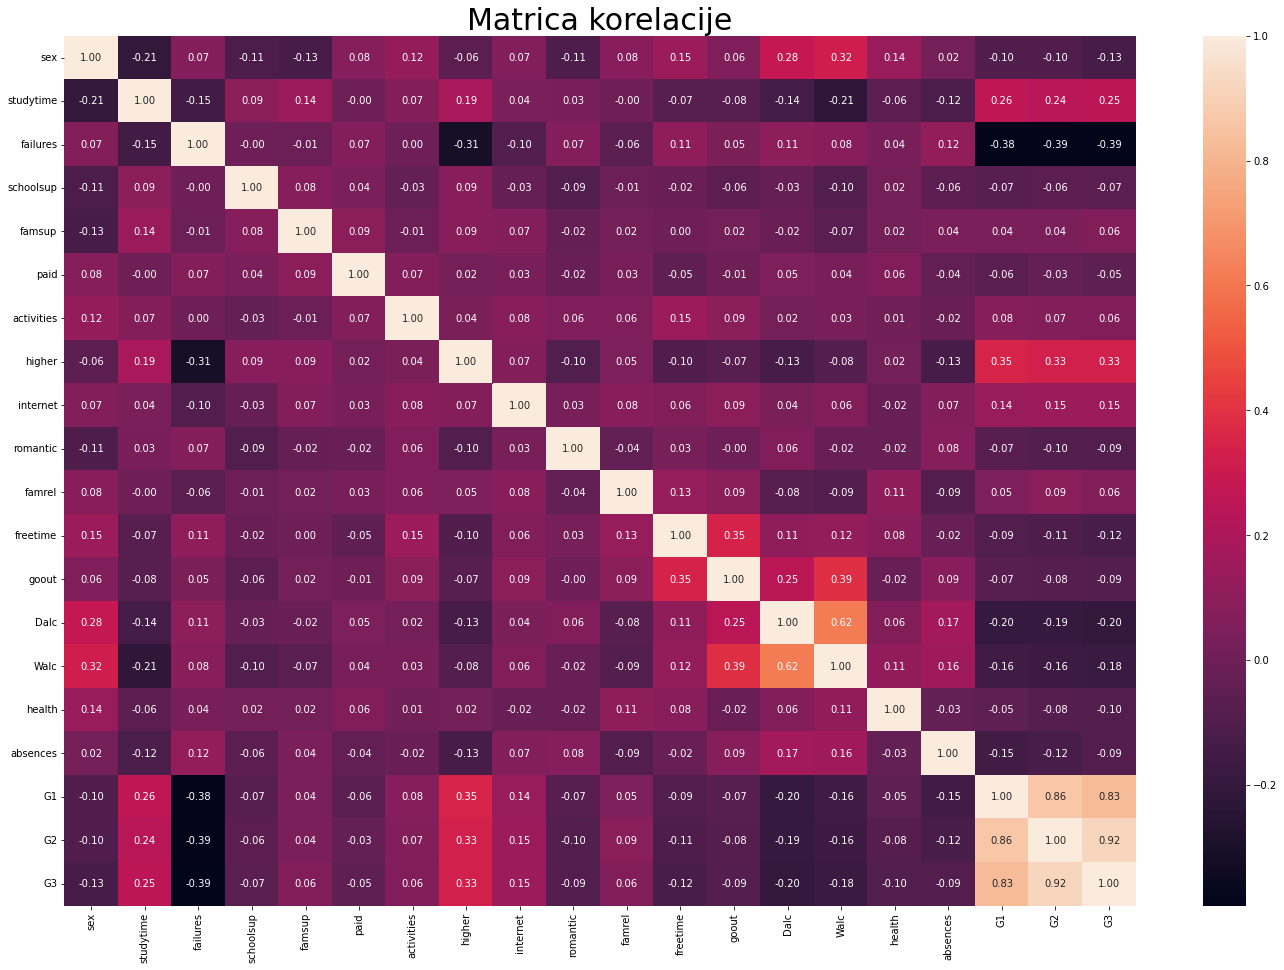

In [ ]:
corr = dfPortuguese.corr()
graph = sns.heatmap(corr, annot = True, fmt = '.2f')
graph.figure.set_size_inches(24, 16)
graph.set_title('Matrica korelacije', fontsize = 30)

Na matrici korelacije primjećujemo da je, izuzev ocjena u polugodištima i ukupno, veći dio heatmapa ljubičaste boje, tj. da nema ni pretjerane pozitivne ni negativne korelacije između vrijednosti. Kako bismo se više u to uvjerili izbacit ćemo vrijednosti korelacije s našim traženim stupcem spola.

In [ ]:
dfPortuguese.corrwith(dfPortuguese['sex']).round(2)

sex           1.00
studytime    -0.21
failures      0.07
schoolsup    -0.11
famsup       -0.13
paid          0.08
activities    0.12
higher       -0.06
internet      0.07
romantic     -0.11
famrel        0.08
freetime      0.15
goout         0.06
Dalc          0.28
Walc          0.32
health        0.14
absences      0.02
G1           -0.10
G2           -0.10
G3           -0.13
dtype: float64

##Balansiranje klasa

Također nas zanima i koliko podataka o kojem spolu imamo.

In [ ]:
print("Broj podataka o osobama ženskog spola je {0}, a o osobama muškog {1}.".format(dfPortuguese.shape[0]-dfPortuguese.sex.sum(),dfPortuguese.sex.sum()))

Broj podataka o osobama ženskog spola je 383, a o osobama muškog 266.


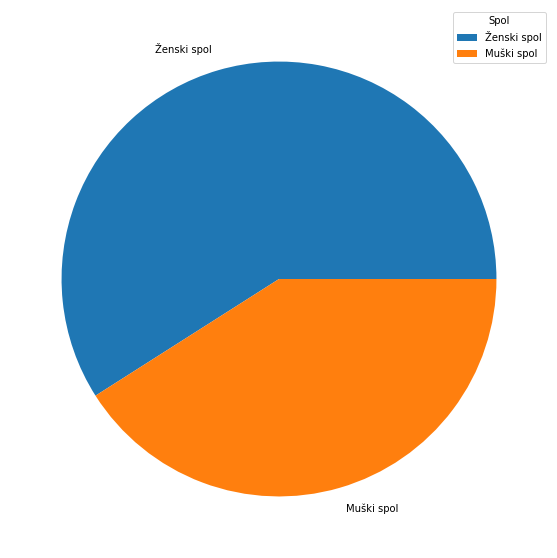

In [ ]:
plt.pie(dfPortuguese.sex.value_counts(), labels=['Ženski spol','Muški spol'])
plt.legend(title="Spol")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

S obzirom da je značajno veći broj podataka o ženama moramo prilagoditi naš dataset.

##Transformacije dataseta


Važno je transformirati dataset tako da su osobe muškog i ženskog spola podjednako zastupljene.

Zatim je potrebno skalirati podatke kako im se ne bi prenapuhala vrijednost u odnosu na podatke mjerene na manjoj ljestvici.

Odlučili smo se za metodu Undersampling jer tako koristimo samo "stvarne" podatke i smanjili broj podataka o ženama na 266 da bi odgovaralo broju podataka o muškarcima.

In [ ]:
nMax = 266

res = dfPortuguese.groupby('sex').apply(lambda x: x.sample(n=min(nMax, len(x)),random_state=31))

print(res['sex'].value_counts())

0    266
1    266
Name: sex, dtype: int64


In [ ]:
sex=res['sex']
res

sex  studytime  failures  schoolsup  famsup  paid  activities  \
sex                                                                      
0   540    0          1         0          0       0     0           0   
    403    0          2         0          0       1     0           1   
    406    0          1         1          0       1     1           0   
    124    0          2         0          0       0     0           0   
    606    0          4         0          0       0     0           0   
...      ...        ...       ...        ...     ...   ...         ...   
1   319    1          1         0          0       0     0           1   
    194    1          2         0          0       1     1           1   
    29     1          2         0          0       1     1           1   
    177    1          1         1          0       0     0           0   
    508    1          1         1          0       1     0           0   

         higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
sex                                                                        
0   540       1         0         1       4         3      3     2     2   
    403       1         1         1       4         3      4     2     2   
    406       1         1         1       4         1      2     1     1   
    124       1         1         1       5         4      4     1     1   
    606       1         1         1       4         2      3     3     1   
...         ...       ...       ...     ...       ...    ...   ...   ...   
1   319       1         1         0       3         2      4     1     4   
    194       1         1         0       3         4      3     2     3   
    29        1         1         1       4         4      5     5     5   
    177       0         1         0       5         3      3     1     4   
    508       1         1         0       4         4      5     1     2   

         health  absences  G1  G2  G3  
sex                                    
0   540       1         5   9  11  11  
    403       1        10  12  15  15  
    406       3         6  10  13  13  
    124       5         0  12  11  11  
    606       5         0  18  18  18  
...         ...       ...  ..  ..  ..  
1   319       3         6  11  12  12  
    194       3         4  11  10  11  
    29        5         4  12  11  12  
    177       2         2   9   8   8  
    508       5         0  10   9   9  

[532 rows x 20 columns]

##Skaliranje

Sljedeće na redu je skaliranje. Sve podatke ćemo prebaciti u istu skalu korištenjem Standard Scalera.

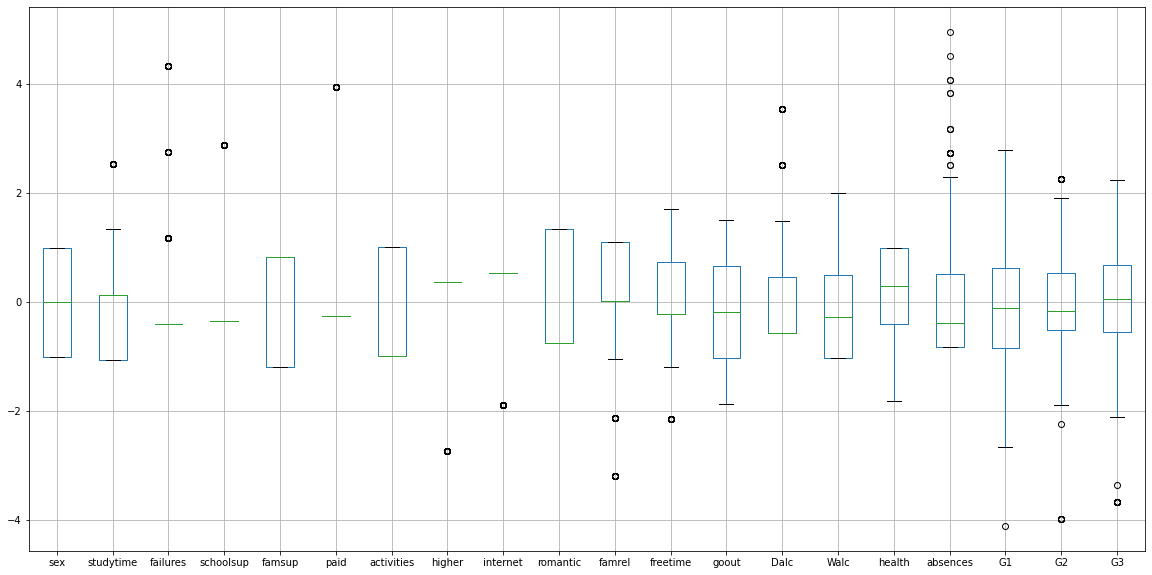

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledStandard = scaler.fit_transform(res)
dfScaled = pd.DataFrame(scaler.transform(res), columns = res.columns)

plt.figure(figsize=(20,10))
dfScaled.boxplot()

##Primjena Logističke regresije i interpretacija rezultata

Sada su svi podatci dovedeni na približno jednake mjerne ljestvice i možemo primjeniti logističku regresiju za provjeru svoje hipoteze.

Podijelimo dataset na train i test set u omjeru 80/20.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfScaled.drop('sex',axis=1),
                                                    dfScaled['sex'], test_size=0.30, random_state=101)

Korištenje modela logističke regresije za prepoznavanje klasa

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

Evaluacija rezultata

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.64      0.71      0.67        82
         1.0       0.66      0.59      0.62        78

    accuracy                           0.65       160
   macro avg       0.65      0.65      0.65       160
weighted avg       0.65      0.65      0.65       160



Matrica konfuzije

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[58, 24],
       [32, 46]])

Zaključujemo da spol ima određenu ulogu u navikama učenika.

##Predviđanje završne ocjene


##Ograničavanje skupa podataka

Iz ranije dobivenog seta koji sadrži podatke vezane za informacije o učenicima pokušavamo saznati informaciju o završnoj ocjeni na kraju školske godine.

In [ ]:
res['sex']=sex

In [ ]:
res.columns

Index(['sex', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Izbacujemo podatake o ocjeni drugog polugodišta jer bi bilo lako izračunati konačnu ocjenu iz podataka o prvom i drugom polugodištu.

In [ ]:
res.reset_index(inplace=True,drop=True)
res1=res.drop([  'G1'], axis=1)

In [ ]:
res1.columns


Index(['sex', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G2', 'G3'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(res1.drop('G3',axis=1),
                                                    res1['G3'], test_size=0.30, random_state=101)

In [ ]:
X_train.columns

Index(['sex', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G2'],
      dtype='object')

Razdvajamo set na dio za testiranje i dio za treniranje.

##Linearna regresija

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

0.1460536598788309


In [ ]:
print(regressor.coef_)

[-0.14488385  0.08600925 -0.16668456 -0.22577606  0.11753442 -0.16378604
  0.07684346  0.19972219  0.26619161  0.04722524 -0.0188124  -0.04106377
  0.03027909  0.07948403 -0.098941    0.00851284  0.01449063  0.98209419]


## Evaluacija rezultata

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
107,16,15.490699
8,13,12.564774
100,18,17.499224
387,9,10.001618
314,16,14.370116
...,...,...
448,11,11.377427
218,7,7.329145
212,8,7.123991
143,11,10.513921


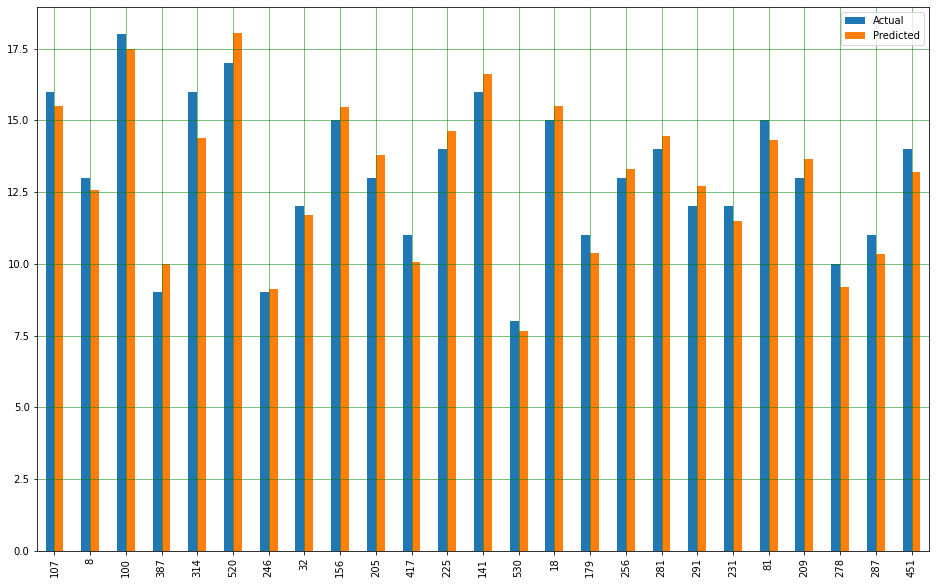

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [-0.14488385  0.08600925 -0.16668456 -0.22577606  0.11753442 -0.16378604
  0.07684346  0.19972219  0.26619161  0.04722524 -0.0188124  -0.04106377
  0.03027909  0.07948403 -0.098941    0.00851284  0.01449063  0.98209419]
Mean squared error: 1.50
Coefficient of determination: 0.85


In [ ]:
df_koe=pd.DataFrame()
df_koe['kategorije']=X_train.columns
df_koe['value']= regressor.coef_
df_koe

,kategorije,value
0,sex,-0.144884
1,studytime,0.086009
2,failures,-0.166685
3,schoolsup,-0.225776
4,famsup,0.117534
5,paid,-0.163786
6,activities,0.076843
7,higher,0.199722
8,internet,0.266192
9,romantic,0.047225


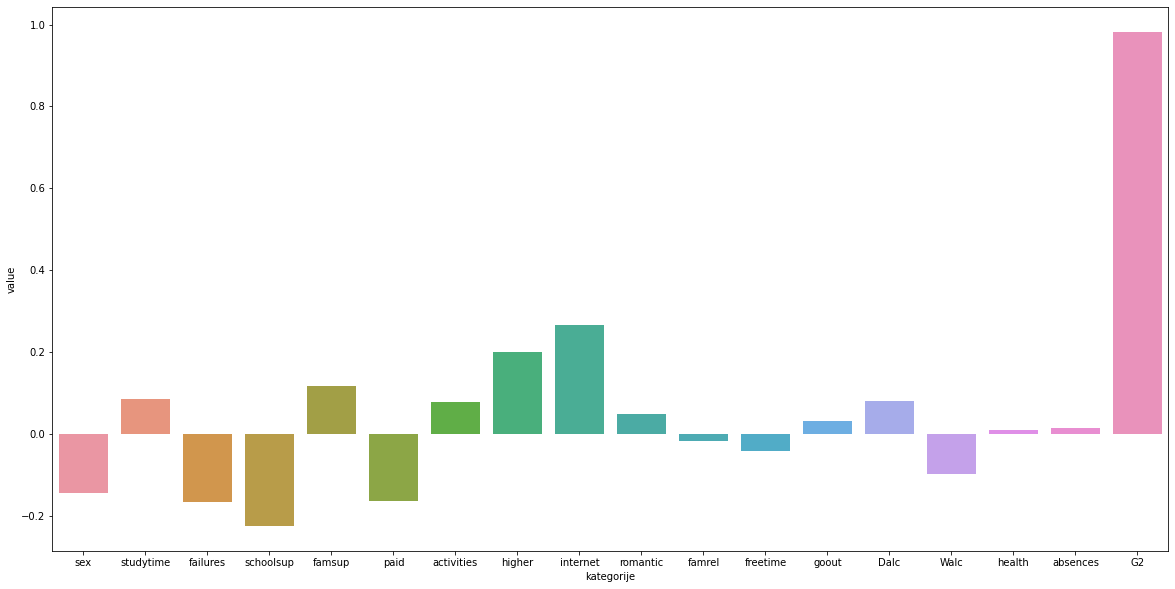

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_koe, x="kategorije", y="value")


##Vektorizacija

In [ ]:
res.columns

Index(['sex', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
res['tot_al']=(5*res['Dalc']+2*res['Walc'])/7
res2=res.drop(['sex', 'schoolsup', 'famsup', 'paid','Dalc', 'Walc', 'G1', 'G2'],axis=1)
res2

,studytime,failures,activities,higher,internet,romantic,famrel,freetime,goout,health,absences,G3,tot_al
0,1,0,0,1,0,1,4,3,3,1,5,11,2.000000
1,2,0,1,1,1,1,4,3,4,1,10,15,2.000000
2,1,1,0,1,1,1,4,1,2,3,6,13,1.000000
3,2,0,0,1,1,1,5,4,4,5,0,11,1.000000
4,4,0,0,1,1,1,4,2,3,5,0,18,2.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1,0,1,1,1,0,3,2,4,3,6,12,1.857143
528,2,0,1,1,1,0,3,4,3,3,4,11,2.285714
529,2,0,1,1,1,1,4,4,5,5,4,12,5.000000
530,1,1,0,0,1,0,5,3,3,2,2,8,1.857143


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(res2.drop('tot_al',axis=1),
                                                    res2['tot_al'], test_size=0.30, random_state=101)

In [ ]:
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
107,1.000000,1.279086
8,1.571429,1.371750
100,1.000000,0.655007
387,2.285714,1.775639
314,1.285714,1.528117
...,...,...
448,1.714286,1.584503
218,1.000000,1.657306
212,1.285714,2.098138
143,3.714286,2.449593


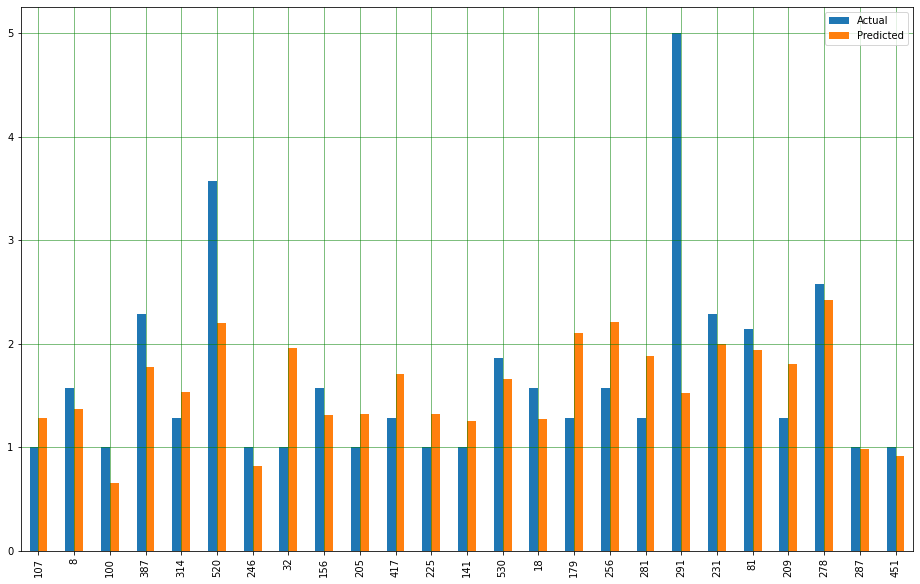

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [-0.14488385  0.08600925 -0.16668456 -0.22577606  0.11753442 -0.16378604
  0.07684346  0.19972219  0.26619161  0.04722524 -0.0188124  -0.04106377
  0.03027909  0.07948403 -0.098941    0.00851284  0.01449063  0.98209419]
Mean squared error: 0.99
Coefficient of determination: 0.17


In [ ]:
df_koe2=pd.DataFrame()
df_koe2['kategorije']=X_train.columns
df_koe2['value']= regr.coef_
df_koe2

,kategorije,value
0,studytime,-0.195913
1,failures,-0.072246
2,activities,-0.001492
3,higher,0.115309
4,internet,0.001255
5,romantic,-0.057616
6,famrel,-0.118043
7,freetime,-0.014094
8,goout,0.239727
9,health,0.064419


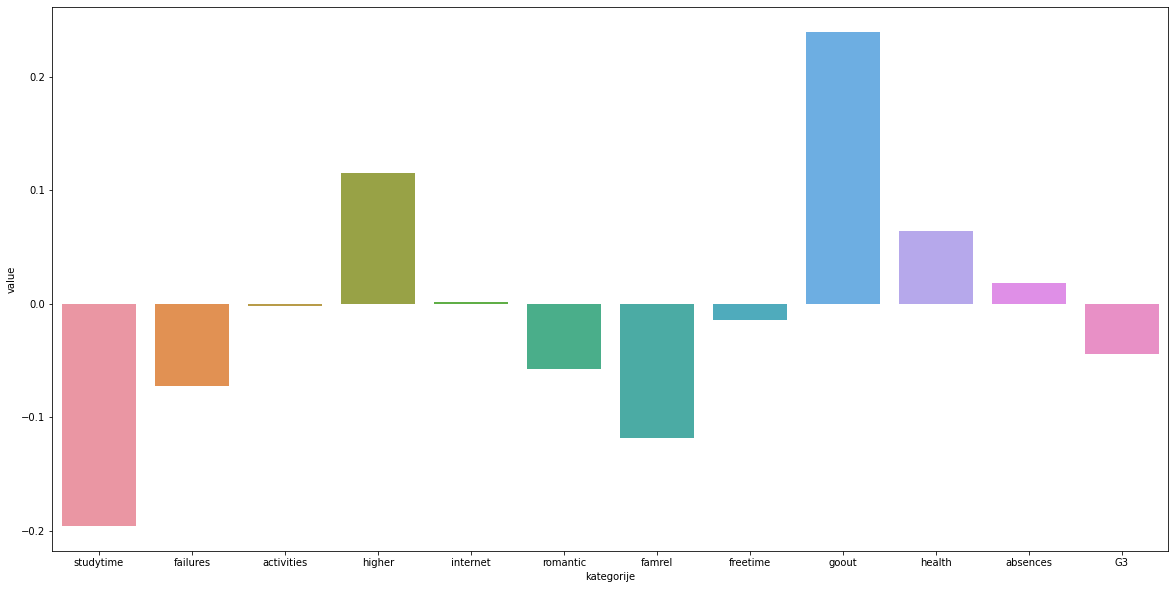

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_koe2, x="kategorije", y="value")


Ne možemo donijeti zaključak o konzumaciji alkohola.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
y=res['tot_al']
x=res.drop(['tot_al','Dalc','Walc'],axis=1)
poly = PolynomialFeatures(degree = 2)
poly_fe = poly.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(poly_fe,y,test_size=0.30, random_state=101)
# Fitting Polynomial Regression to the dataset
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)

poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

1.3192770616482032

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_y_predicted})
df

,Actual,Predicted
107,1.000000,1.554810
8,1.571429,1.303833
100,1.000000,1.820984
387,2.285714,2.285522
314,1.285714,1.524200
...,...,...
448,1.714286,2.194641
218,1.000000,2.950867
212,1.285714,2.461182
143,3.714286,1.031250


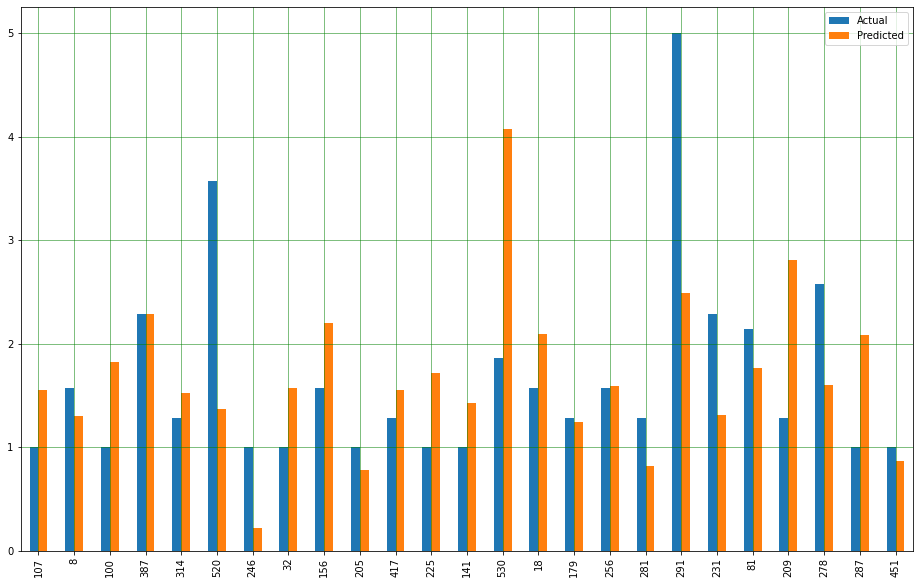

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,poly_reg_y_predicted))
r2 = r2_score(y_test,poly_reg_y_predicted)
print(rmse)
print(r2)


1.3192770616482032
-0.45291566382993187


In [ ]:
poly_reg_model.coef_.shape

(190,)

Povećanje stupnja polinoma nije nas dovelo na pravi put što upućuje na to da regresija možda nije ispravan način za pronalazak informacije o konzumaciji alkohola. S obzirom da konzumaciju možemo prikazati diskretnim vrijednostima problem ćemo pokušati riješiti klasifikacijom.

## Metoda slučajne šume
Problemu smo odlučili pristupiti na drukčiji način i umjesto pristupa regresije pokušati svrstati učenike u grupe po ukupnom rezultatu konzumacije alkohola metodama klasifikacije.

In [ ]:
y=res['Dalc']+res['Walc']
x=res.drop(['tot_al','Dalc','Walc'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.344
Mean accuracy score: 0.356


Rezultati su malo bolji, no i dalje nisu dobri.